## Restaurant Recommendation System

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\HOME\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


##### Data reading

In [2]:
data = pd.read_csv(r'C:\Users\HOME\Desktop\DSA\Project\resto.csv',delimiter='|')

# Displaying No of rows X No of Columns
data.shape

(15081, 12)

In [3]:
#displaying first 5 contents of data by default
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             15081 non-null  object
 1   PRICE            15080 non-null  object
 2   CUSINE_CATEGORY  15079 non-null  object
 3   CITY             15080 non-null  object
 4   REGION           15080 non-null  object
 5   URL              15080 non-null  object
 6   PAGE NO          15080 non-null  object
 7   CUSINE TYPE      15080 non-null  object
 8   TIMING           15015 non-null  object
 9   RATING_TYPE      14070 non-null  object
 10  RATING           15080 non-null  object
 11  VOTES            15080 non-null  object
dtypes: object(12)
memory usage: 1.4+ MB


# EDA Process

### Data Cleaning

In [4]:
# Identifying duplicate values from data

data.dropna(axis=0, how='any', inplace=True)

data.drop_duplicates(inplace=True,keep=False)

data.drop(columns=['CITY','URL','PAGE NO','TIMING','VOTES'],inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13120 entries, 0 to 15079
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             13120 non-null  object
 1   PRICE            13120 non-null  object
 2   CUSINE_CATEGORY  13120 non-null  object
 3   REGION           13120 non-null  object
 4   CUSINE TYPE      13120 non-null  object
 5   RATING_TYPE      13120 non-null  object
 6   RATING           13120 non-null  object
dtypes: object(7)
memory usage: 820.0+ KB


#### No null values in data now

In [5]:
# Renaming columns
data.rename({'CUSINE_CATEGORY' : 'CUISINE', 'CUSINE TYPE' : 'OUTLET_TYPE', 'RATING_TYPE': 'REVIEWS'},axis=1, inplace=True)

data.head()

,NAME,PRICE,CUISINE,REGION,OUTLET_TYPE,REVIEWS,RATING
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,Excellent,4.9
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,Very Good,4.4
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,Very Good,4.2
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,Very Good,4.3
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,Veľmi dobré,4.4


In [6]:
#Cleaning Reviews column to english only
data['REVIEWS'].replace(to_replace='Excelente' , value='Excellent', inplace=True)
data['REVIEWS'].replace(to_replace=['Veľmi dobré','Bardzo dobrze','Muy Bueno','Velmi dobré'] , value='Very Good', inplace=True)
data['REVIEWS'].replace(to_replace=['Skvělá volba','Dobrze','Bueno','Buono','Dobré','Bom','Skvělé'] , value='Good', inplace=True)
data['REVIEWS'].replace(to_replace=['Priemer','Média','Çok iyi'] , value='Average', inplace=True)
data['REVIEWS'].replace(to_replace=['Průměr','Promedio','Ortalama','Muito Bom','İyi'] , value='Poor', inplace=True)
data['REVIEWS'].replace(to_replace=['Baik','Biasa','Media','Sangat Baik'] , value='Very Poor', inplace=True)
data['REVIEWS'].replace(to_replace=['None'] , value='Not Rated', inplace=True)
data['REVIEWS'].unique()


C:\Users\HOME\AppData\Local\Temp\ipykernel_4904\4013455537.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['REVIEWS'].replace(to_replace='Excelente' , value='Excellent', inplace=True)
C:\Users\HOME\AppData\Local\Temp\ipykernel_4904\4013455537.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

array(['Excellent', 'Very Good', 'Good', 'Not rated', 'Average', 'Poor',
       'Very Poor'], dtype=object)

In [7]:
data.head()

,NAME,PRICE,CUISINE,REGION,OUTLET_TYPE,REVIEWS,RATING
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,Excellent,4.9
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,Very Good,4.4
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,Very Good,4.2
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,Very Good,4.3
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,Very Good,4.4


In [8]:
#cleaning region column
data['REGION'] = data['REGION'].str.replace('[a-zA-Z].+-- ','',regex=True)
data['REGION'] = data['REGION'].str.replace(' West| west| East| east','',regex=True)

In [9]:
data['REGION'] = data['REGION'].str.replace('4 Bungalows|7 Andheri|Azad Nagar|Near Andheri Station|Veera Desai Area|Mahakali','Andheri',regex=True)
data['REGION'] = data['REGION'].str.replace('Bandra Kurla Complex','Bandra',regex=True)
data['REGION'] = data['REGION'].str.replace('CBD-Belapur','CBD Belapur',regex=True)
data['REGION'] = data['REGION'].str.replace('Girgaon Chowpatty','Chowpatty',regex=True)
data['REGION'] = data['REGION'].str.replace('Dadar Shivaji Park','Dadar',regex=True)
data['REGION'] = data['REGION'].str.replace('Flea Bazaar Café|Kamala Mills Compound','Lower Parel',regex=True)
data['REGION'] = data['REGION'].str.replace('Runwal Green','Mulund',regex=True)
data['REGION'] = data['REGION'].str.replace('Mumbai CST Area','Mumbai Central',regex=True)
data['REGION'] = data['REGION'].str.replace('Kopar Khairane|Seawoods|Turbhe|Ulwe','Navi Mumbai',regex=True)
data['REGION'] = data['REGION'].str.replace('New Panvel|Old Panvel','Panvel',regex=True)
data['REGION'] = data['REGION'].str.replace('Kamothe','Sion',regex=True)
data['REGION'] = data['REGION'].str.replace('Ghodbunder Road|Majiwada','Thane',regex=True)

data['REGION'].unique()

array(['Bandra', 'Mahim', 'Juhu', 'Lower Parel', 'Marol', 'Andheri',
       'Dadar', 'Khar', 'Mumbai Central', 'Bhandup', 'Malad', 'Powai',
       'Chembur', 'Goregaon', 'Vile Parle', 'CBD Belapur', 'Ghansoli',
       'Borivali', 'Vasai', 'Thane', 'Worli', 'Parel', 'Colaba',
       'Nariman Point', 'Santacruz', 'Mulund', 'Kandivali', 'Airoli',
       'Mira Road', 'Fort', 'Jogeshwari', 'Vashi', 'Ghatkopar', 'Byculla',
       'Kalyan', 'Bhayandar', 'Sakinaka', 'Charni Road', 'Chandivali',
       'Mohammad Ali Road', 'Kharghar', 'Matunga', 'Ulhasnagar',
       'Navi Mumbai', 'Dahisar', 'Kurla', 'Chowpatty', 'Panvel', 'Sion',
       'Tardeo', 'Mazgaon', 'Prabhadevi', 'Sanpada', 'Virar', 'Girgaum',
       'Mumbra', 'Marve', 'Marine Lines', 'Mahalaxmi', 'Chakala',
       'Nalasopara', 'Kalwa', 'Nerul', 'Grant Road', 'Breach Candy',
       'Churchgate', 'Vikhroli', 'Kalbadevi', 'Dombivali', 'Kemps Corner',
       'Malabar Hill', 'Kalamboli', 'Wadala', 'Alibaug', 'Peddar Road',
       'Amberna

In [10]:
unique_ratings = data['RATING'].unique()
print(unique_ratings)

['4.9' '4.4' '4.2' '4.3' '4.5' '4.7' '4.0' '4.6' '4.1' '3.9' '3.8' '-'
 '3.6' '3.4' '3.0' '3.7' '4.8' '3.3' '3.5' '3.2' '3.1' '2.7' '2.5' '2.8'
 '2.6' '2.3' '2.9' '2.4' '2.1' '2.2' '1.8' '2.0']


In [11]:
data['RATING'] = data['RATING'].replace('-', 4.5)

In [12]:
#checking for null values

data.isnull().sum()

NAME           0
PRICE          0
CUISINE        0
REGION         0
OUTLET_TYPE    0
REVIEWS        0
RATING         0
dtype: int64

In [13]:
# Changing Datatype of column

data = data.astype({'NAME':str, 'PRICE':int, 'CUISINE':str, 'OUTLET_TYPE':'category','REVIEWS':'category', 'RATING':float})

In [14]:
data

,NAME,PRICE,CUISINE,REGION,OUTLET_TYPE,REVIEWS,RATING
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,Excellent,4.9
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,Very Good,4.4
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,Very Good,4.2
3,Butterfly High,1000,Modern Indian,Bandra,Bar,Very Good,4.3
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,Very Good,4.4
...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Andheri,Casual Dining,Good,3.5
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali,Quick Bites,Good,3.7
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,Average,3.4
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor,Good,3.5


# Vizualizing Data

In [15]:
from matplotlib import pyplot as plt

In [16]:
#Top 10 types of outlets
data['OUTLET_TYPE'].value_counts().nlargest(10)

OUTLET_TYPE
Quick Bites       4744
Casual Dining     4598
none              1547
Bakery             730
Dessert Parlor     557
Café               332
Sweet Shop         161
Beverage Shop      111
Food Court          75
Dhaba               51
Name: count, dtype: int64

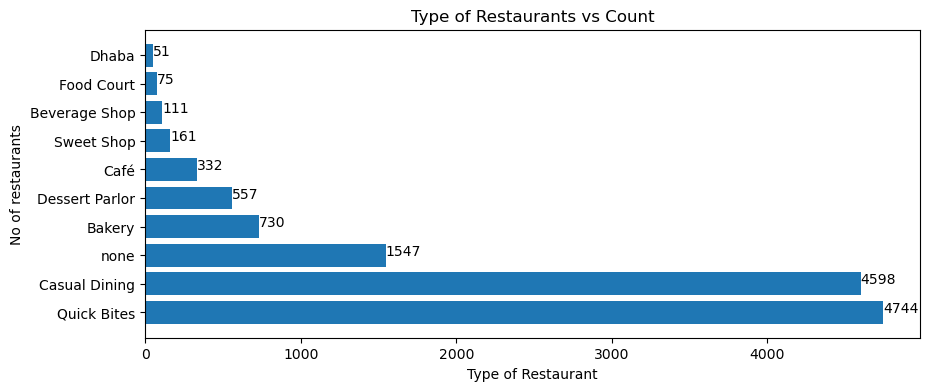

In [17]:
#Graph between no. of restaurant and type of outlet
x = data['OUTLET_TYPE'].value_counts().nlargest(10).index
y = data['OUTLET_TYPE'].value_counts().nlargest(10).values
plt.figure(figsize=(10, 4))
plt.title("Type of Restaurants vs Count")
plt.xlabel("Type of Restaurant")
plt.ylabel("No of restaurants")
plt.barh(x,y)
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.show()

c:\Users\HOME\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


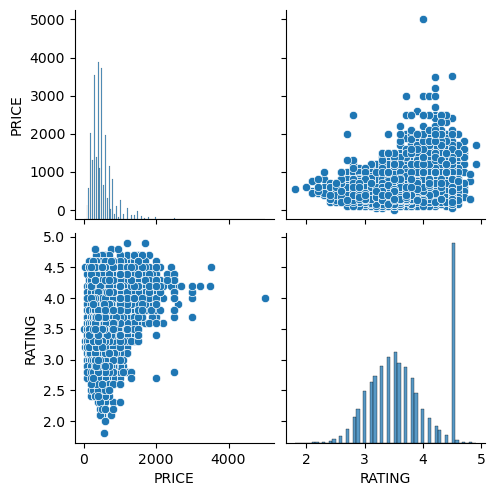

In [18]:
# seaborn plot for visualising
sns.pairplot(data)

# Testing Deployment

### Finding Restaurants!

In [19]:
place = input("Enter the locality to dine in: ").lower()
place_df = data[data['REGION'].str.lower().str.contains(place)]
place_df

,NAME,PRICE,CUISINE,REGION,OUTLET_TYPE,REVIEWS,RATING
38,Hari Om Sai,300,"Beverages,Fast Food",Thane,Quick Bites,Average,3.4
42,United Food Nation,500,"Fast Food,Burger,American,Beverages",Thane,Quick Bites,Very Good,4.1
46,Chaubara 601,1000,North Indian,Thane,Casual Dining,Very Good,4.2
60,Prashant Corner,300,"Mithai,Street Food",Thane,Sweet Shop,Very Good,4.3
76,Ceremonial Kitchen & Co,1000,"Seafood,Maharashtrian,North Indian,Chinese",Thane,Casual Dining,Excellent,4.6
...,...,...,...,...,...,...,...
14936,Kath N Ghat,1000,Maharashtrian,Thane,Casual Dining,Very Good,4.0
15013,Sanskruti,600,"Chinese,North Indian",Thane,Casual Dining,Good,3.6
15018,Flavours Kitchen,500,"North Indian,Biryani,Kebab",Thane,Casual Dining,Average,3.3
15030,Tummy Makeover,350,"Bengali,Biryani,Fast Food,Mongolian,North Indi...",Thane,none,Good,3.6


In [20]:
# Sorting by user desired cuisine
cuisine = input('Enter cuisine to dine in: ').lower()
cuisine_df = place_df[place_df['CUISINE'].str.lower().str.contains(f'{cuisine}')] 
cuisine_df

,NAME,PRICE,CUISINE,REGION,OUTLET_TYPE,REVIEWS,RATING
46,Chaubara 601,1000,North Indian,Thane,Casual Dining,Very Good,4.2
76,Ceremonial Kitchen & Co,1000,"Seafood,Maharashtrian,North Indian,Chinese",Thane,Casual Dining,Excellent,4.6
151,Indiana Water's,1200,"Chinese,North Indian,Seafood,Italian,Continental",Thane,Casual Dining,Very Good,4.3
176,Royal Garden,700,"North Indian,Chinese,Seafood",Thane,Casual Dining,Average,3.4
189,Hotel Tunga,300,"North Indian,Chinese",Thane,Casual Dining,Average,3.4
...,...,...,...,...,...,...,...
14880,BLH - Bhartiya Lunch Home,400,"North Indian,Chinese",Thane,Quick Bites,Very Good,4.1
15013,Sanskruti,600,"Chinese,North Indian",Thane,Casual Dining,Good,3.6
15018,Flavours Kitchen,500,"North Indian,Biryani,Kebab",Thane,Casual Dining,Average,3.3
15030,Tummy Makeover,350,"Bengali,Biryani,Fast Food,Mongolian,North Indi...",Thane,none,Good,3.6


In [23]:
price = input('Enter H to sort from high to low price,\nEnter L to sort from low to high price.')

if price.lower() == 'h':
    price_sort = cuisine_df.sort_values(by='PRICE', ascending=False)

elif price.lower() == 'l':
    price_sort = cuisine_df.sort_values(by='PRICE', ascending=True)

else:
    print('Enter Appropriate character')



In [24]:
price_sort

,NAME,PRICE,CUISINE,REGION,OUTLET_TYPE,REVIEWS,RATING
240,India Bistro,1600,"North Indian,Mughlai,Biryani",Thane,Bar,Very Good,4.4
9606,Copper Chimney,1500,"North Indian,Mughlai",Thane,Casual Dining,Good,3.8
14372,Palates - Hotel Satkar Residency,1500,"North Indian,Continental,Mughlai",Thane,Casual Dining,Good,3.8
9250,City Forestt Family Restaurant & Bar,1400,"North Indian,Chinese,Seafood,Malwani",Thane,Casual Dining,Very Good,4.2
5156,Paps Premium Lounge,1400,"North Indian,Mexican,Continental",Thane,Lounge,Excellent,4.7
...,...,...,...,...,...,...,...
4833,KERALIGHT,150,South Indian,Thane,none,Average,3.4
2926,Simbly South,150,"South Indian,Fast Food,Street Food,Juices",Thane,Quick Bites,Good,3.5
10967,Hotel New Vikrant,150,"South Indian,Maharashtrian",Thane,Quick Bites,Not rated,4.5
4326,Swamy's Idli Tiffin,150,South Indian,Thane,Quick Bites,Average,3.4
